In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
vector1 = tf.constant(np.random.rand(6,6))

In [ ]:
vector1 = tf.add(vector1, 2)

In [ ]:
sess.run(vect1added)

In [ ]:
print(sess.run([scalar1, vector1]))

In [ ]:
vector1

In [ ]:
tf.reset_default_graph()

In [ ]:
tf.constant(10000)

In [ ]:
tf.contrib.factorization.

In [ ]:
sess = tf.Session()

In [ ]:
print(sess.run('Const:0'))

In [ ]:
print(tf.get_default_graph().as_graph_def())

In [ ]:
tf.contrib.factorization.gmm()

In [14]:
chan_index = int(input('Enter channel index to analyze:'))
# print('Enter Open Ephys data directory path:')
# source_path = raw_input()

Enter channel index to analyze:5


In [2]:
source_path = '../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55'

In [4]:
import time
t0 = time.time()
import OpenEphys
from kaveh.toolbox import common_avg_ref, butter_bandpass_filter
import Kwik
from matplotlib import pyplot as plt
import numpy as np
import os
import re
import scipy.signal

In [5]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [5]:
f_names = []
for root, dirnames, filenames in os.walk(source_path):
    for filename in filenames:
        f_regex = re.compile(r".*CH(\d|\d\d)\.continuous$")
        if f_regex.match(filename):
            f_names = f_names + [os.path.join(root, filename)]
f_names = np.array(f_names)
chans = [int(f.split('.')[-2].split('_')[-1][2:]) for f in f_names]
f_names = f_names[np.argsort(chans)] # now sorted by channel number

In [6]:
chan_data = []
for contact in range(7):
    contact_reps = []
    for i in range(contact*4, contact*4 + 4):
        print('Reading {}...'.format(f_names[i]))
        file_content = OpenEphys.load(f_names[i])
        Fs = float(file_content['header']['sampleRate'])
        signal_filtered = butter_bandpass_filter(file_content['data'], 300, 3000, Fs, order=2 )
        contact_reps.append(signal_filtered)
    contact_reps = np.array(contact_reps)
    chan_data.append(np.mean(contact_reps, axis=0))
    print('-----------------------------------------------')
chan_data = np.array(chan_data)
contact_reps = None

Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH1.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH2.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH3.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH4.continuous...
Loading continuous data...
-----------------------------------------------
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH5.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH6.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH7.continuous...
Loading continuous data...
Reading ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/101_CH8.continuous...
Loading continuous data...
-----------------------------------------------
Reading ../data/

In [7]:
common_avg_ref(chan_data)
chan_data = scipy.signal.detrend(chan_data)

chan_filtered_fname = os.path.join(source_path, 'channels_filtered.npy')
print('Saving filtered data to {}'.format(chan_filtered_fname))
np.save(chan_filtered_fname, chan_data)

Saving filtered data to ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/channels_filtered.npy


In [15]:
chan_filtered_fname = os.path.join(source_path, 'channels_filtered.npy')
chan_data = np.load(chan_filtered_fname)
Fs = 30000.0

In [28]:
from cssorter.spikesorter_gpu import ComplexSpikeSorter
dt = 1.0/Fs
css = ComplexSpikeSorter(chan_data[chan_index, :], dt)
css.run()
print(css.cs_indices.shape)

Pre-process time = 0.8978099822998047
Using gpu minibatch spike detection, batch size = 50s
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.71674633
1:	mean-likelihood -12.71670437	difference 4.1961669921875e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.76758003
1:	mean-likelihood -12.76754379	difference 3.62396240234375e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.77951431
1:	mean-likelihood -12.77947998	difference 3.4332275390625e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.80414009
1:	mean-likelihood -12.80410957	difference 3.0517578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.82250500
1:	mean-likelihood -12.82247639	difference 2.86102294921875e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.81912804
1:	mean-likelihood -12.81909847	difference 2.956390380859375e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.86408806
1:	mean-likelihood -12.86405087	difference 3.719329833984375e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.92554665
1:	mean-likelihood -12.92551327	difference 3.337860107421875e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -12.94572163
1:	mean-likelihood -12.94569111	difference 3.0517578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.00929737
1:	mean-likelihood -13.00927067	difference 2.6702880859375e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.02227592
1:	mean-likelihood -13.02224159	difference 3.4332275390625e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.01934528
1:	mean-likelihood -13.01931763	difference 2.765655517578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.06861687
1:	mean-likelihood -13.06858540	difference 3.147125244140625e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.12396431
1:	mean-likelihood -13.12393856	difference 2.574920654296875e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.09456539
1:	mean-likelihood -13.09453201	difference 3.337860107421875e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.11111832
1:	mean-likelihood -13.11108685	difference 3.147125244140625e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.08723736
1:	mean-likelihood -13.08720684	difference 3.0517578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.04616547
1:	mean-likelihood -13.04613304	difference 3.24249267578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.03248310
1:	mean-likelihood -13.03245163	difference 3.147125244140625e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.17271900
1:	mean-likelihood -13.17268372	difference 3.528594970703125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.17168427
1:	mean-likelihood -13.17164898	difference 3.528594970703125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.19732761
1:	mean-likelihood -13.19729042	difference 3.719329833984375e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.17662430
1:	mean-likelihood -13.17659187	difference 3.24249267578125e-05
Place holders defined


/usr/local/lib/python3.5/dist-packages/sklearn/mixture/base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


Input statistics computed
0:	mean-likelihood -13.18636799
1:	mean-likelihood -13.18633080	difference 3.719329833984375e-05
Spike detection time = 32.76496767997742
Align spikes time = 46.86624503135681
CS spike detection time = 79.51335716247559
CS post process time = 93.56648397445679
(4767,)


In [108]:
css.voltage.size

36038656

In [29]:
num_clusters = 8
pre_time = 0.0005
post_time = 0.005
clusters, cluster_labels = css.cluster_detected_cs(num_clusters=num_clusters, pre_time=pre_time, post_time=post_time)
ss_indices = css.get_ss_indices()

In [30]:
ss_indices.shape

(128035,)

In [31]:
import random
pre_index = int(np.round(pre_time/css.dt))
post_index = int(np.round(post_time/css.dt))
aligned_ss = np.array([css.voltage[i - pre_index : i + post_index] for i in ss_indices[1:-2]])
mean_ss = np.mean(aligned_ss[random.sample(range(0, aligned_ss.shape[0]), css.cs_indices.size), ], axis=0)

<IPython.core.display.Javascript object>


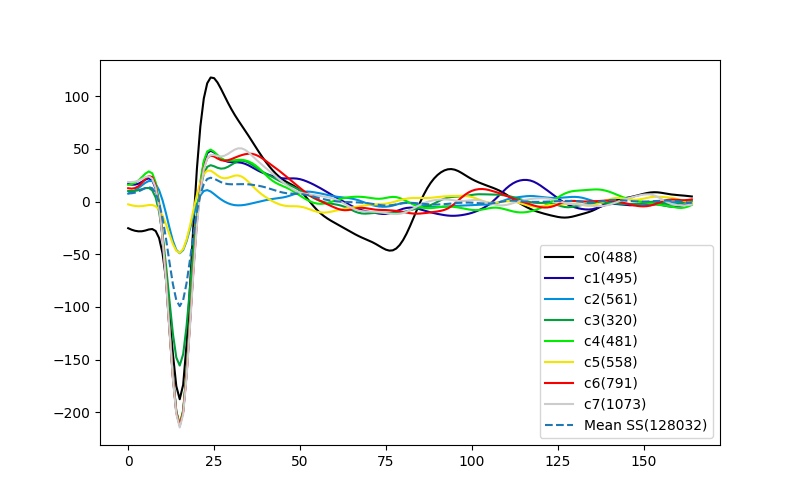

In [32]:
# plot cluster means
colors = plt.cm.nipy_spectral(np.linspace(0,1,num_clusters))
legend_labels = []
for cn in np.arange(num_clusters):
    legend_labels.append('c{}({}) '.format(cn, clusters[cn].shape[0]))

import gc
gc.collect()
plt.figure(figsize=(8,5))
clust_means = []
paxes = []
for cn in np.arange(num_clusters):
    clust_means.append(np.mean(clusters[cn], axis=0))
    ax = plt.plot(clust_means[-1], color = colors[cn], label = legend_labels[cn])
    paxes.append(ax)
plt.plot(mean_ss, '--', label = 'Mean SS({})'.format(aligned_ss.shape[0]))
plt.legend() 

In [33]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(clust_means)
cs_clust = np.argmax(np.sum(np.abs(kmeans.cluster_centers_), axis=1))
clusters_to_pick = np.where(kmeans.labels_ == cs_clust)[0]
print('Detected CS clusters: {}'.format(clusters_to_pick))

Detected CS clusters: [0 1 3 4 6 7]


In [34]:
cs_indices_to_pick = []
for cti in clusters_to_pick:
    cs_indices_to_pick = np.union1d(cs_indices_to_pick, css.cs_indices[np.where(cluster_labels == cti)])
cs_indices = cs_indices_to_pick.astype(np.int64)
print('Number of detected CS: {}'.format(cs_indices.shape))

Number of detected CS: (3648,)


In [30]:
CS_csv_filename = os.path.join(source_path, 'channel_{}.CS.gpu.csv'.format(chan_index))
SS_csv_filename = os.path.join(source_path, 'channel_{}.SS.gpu.csv'.format(chan_index))

import csv
with open(CS_csv_filename, 'w+') as f:
    print('writing {} ... '.format(CS_csv_filename))
    f.seek(0)
    csvwriter = csv.writer(f, delimiter = ',')
    csvwriter.writerows(cs_indices.reshape(-1,1))
    
with open(SS_csv_filename, 'w+') as f:
    print('writing {} ... '.format(SS_csv_filename))
    f.seek(0)
    csvwriter = csv.writer(f, delimiter = ',')
    csvwriter.writerows(ss_indices.reshape(-1,1))

writing ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/channel_5.CS.gpu.csv ... 
writing ../data/OpenEphys_data/2019-04-26/2019-04-26_12-03-55/channel_5.SS.gpu.csv ... 


In [41]:
with open(os.path.join(source_path, 'channel_{}.CS.csv'.format(chan_index)), 'r') as f:
    f.seek(0)
    csvreader = csv.reader(f, delimiter = ',')
    cs_indices_cpu = np.squeeze(np.array(list(csvreader), dtype=np.int64))

In [50]:
cs_indices_gpu = cs_indices

In [53]:
print(cs_indices_gpu.shape)
print(cs_indices_cpu.shape)

(494,)
(529,)


In [81]:
diff_indices = np.setdiff1d(cs_indices_cpu, cs_indices_gpu)

<IPython.core.display.Javascript object>


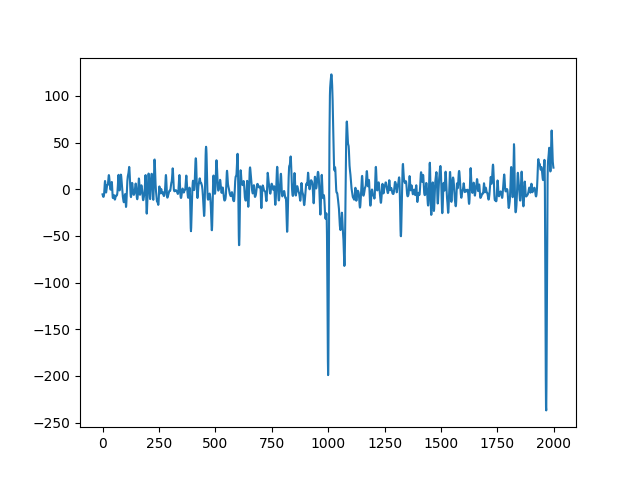

In [107]:
i = 24
plt.figure()
plt.plot(css.voltage[diff_indices[i]-1000:diff_indices[i]+1000])

(529,)

In [ ]:
# css._pre_process()


In [130]:
np.sort(np.random.choice(100, size=(1,10), replace=False))

array([[10, 15, 23, 28, 31, 43, 45, 56, 84, 89]])

<IPython.core.display.Javascript object>


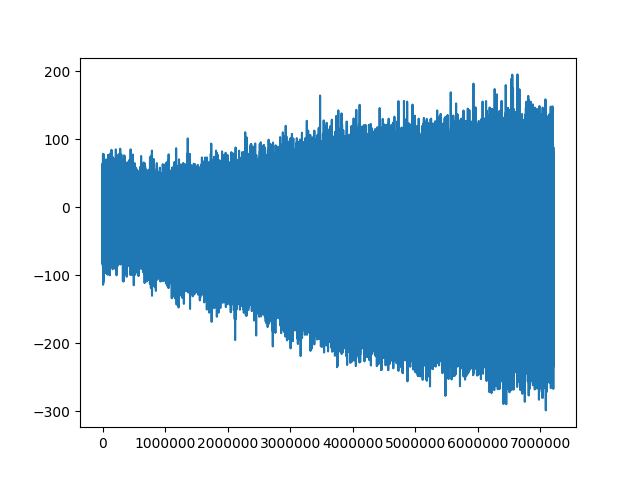

In [22]:
plt.figure()
plt.plot(css.voltage[0::5])

In [ ]:

def input_fn():
  return tf.compat.v1.train.limit_epochs(
      tf.convert_to_tensor(css.voltage_filtered, dtype=tf.float32), num_epochs=1)


In [ ]:
tf.convert_to_tensor(css.voltage_filtered, dtype=tf.float32)

In [ ]:
num_points = 100
dimensions = 2
points = np.random.uniform(0, 1000, [num_points, dimensions])
tf.convert_to_tensor(points, dtype=tf.float32)


In [ ]:
num_clusters = 6

In [ ]:
[loss, scores, assignments, training_op, init_op, is_init] = tf.contrib.factorization.gmm(tf.convert_to_tensor(css.voltage_filtered.reshape(-1,1),
                                                  dtype=tf.float32), initial_clusters='random',
                             num_clusters=6, random_seed=0, covariance_type='full')

In [ ]:
sess = tf.Session()


In [ ]:
sess.run(init_op)

In [ ]:
sess.run([training_op, loss, assignments, init_op])

In [ ]:
from sklearn.datasets import make_blobs
from gpu_gmm import GaussianMixture
import numpy as np
from gpu_gmm import generate_gmm_data
import matplotlib.pyplot as plt

In [ ]:
int(50/dt)

In [ ]:
# DIMENSIONS = 40
COMPONENTS = 6
# DATA_POINTS = 500000

BATCH_SIZE = int(100/dt)
TRAINING_STEPS = 50
TOLERANCE = 1e-4

T0 = 500
alpha_eta = 0.6

# Generating data
# data, y = make_blobs(n_samples=DATA_POINTS, n_features=DIMENSIONS, centers=COMPONENTS,
#                                    random_state=10)
#data, true_means, true_variances, true_weights = generate_gmm_data( DATA_POINTS, COMPONENTS, DIMENSIONS, 10)


gmm = GaussianMixture(COMPONENTS=COMPONENTS,
                      BATCH_SIZE = BATCH_SIZE,
                      TRAINING_STEPS=TRAINING_STEPS,
                      TOLERANCE = TOLERANCE, verbose=2)

gmm.fit(css.voltage_filtered.reshape(-1,1))


# test_idx = np.random.choice(range(len(data)), size=5000, replace=False)
# test = data[test_idx]

ll, features = gmm.predict_proba(css.voltage_filtered.reshape(-1,1))
print(ll)
print(gmm.mean_log_likelihood)
print(features.shape)

In [ ]:
labels = np.argmax(features, axis=0)

In [ ]:
spike_indices = np.where(labels == np.argmax(gmm.means.eval()))[0]

In [ ]:
peak_times,_ = scipy.signal.find_peaks(css.voltage_filtered[spike_indices])

In [ ]:
spike_inds = spike_indices[peak_times]

In [ ]:
spike_peaks = np.array([np.argmin(css.voltage[max(0, si - int(0.0005/css.dt)) : si + int(0.002/css.dt)]) for si in spike_inds])
spike_inds = spike_inds + spike_peaks - int(0.0005/css.dt)

In [ ]:
css.spike_indices = spike_inds

In [ ]:
spike_inds = css._remove_overlapping_spike_windows()

In [ ]:
plt_range = [0, 10020000]
plt.close()
plt.figure()
plt.plot(np.arange(plt_range[0], plt_range[1]), css.voltage[plt_range[0]:plt_range[1]])
plt.eventplot(spike_inds[np.where(spike_inds >= plt_range[0])[0][0]:np.where(spike_inds <= plt_range[1])[0][-1]+1],
              linelengths=200, colors='r',zorder=10, alpha=0.3)
plt.show()

In [ ]:
spike_inds[0:np.where(spike_inds <= 10000)[0][-1]+1]

In [ ]:
plt.eventplot(spike_indices[0:np.where(spike_indices == 10000)[0]], linelengths=200, colors='r',zorder=10)

In [ ]:
print(gmm.means.eval())

In [ ]:
css.voltage_filtered.reshape(-1,1)

In [ ]:
num_clusters=6
def input_fn():
    return tf.train.limit_epochs(tf.convert_to_tensor(css.voltage_filtered.reshape(-1,1), dtype=tf.float32), num_epochs=1)

kmeans = tf.contrib.factorization.KMeansClustering(num_clusters=num_clusters, use_mini_batch=False)
num_iterations = 2

previous_centers = None
for _ in range(num_iterations):
    kmeans.train(input_fn)
    cluster_centers = kmeans.cluster_centers()
    print('score:', kmeans.score(input_fn))

# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn))